# Mahdiazhari Austian
# 11206004


# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
90* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

# Imports Section

In [62]:

%pylab inline


from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.preprocessing import StandardScaler # to normalize data
from sklearn.neighbors import KNeighborsClassifier #K classifier
from sklearn.model_selection import cross_val_score  # for 10-fold cross validation
from sklearn.model_selection import GridSearchCV  # for 10-fold cross validation
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score  #for making the reports


Populating the interactive namespace from numpy and matplotlib


# Implementation of the experiment

## Motivation behind pre-processing:
We are going to use Logistic regression and K nearest neighbors algorithms, and both of these algorithms need standardization. Standardization will help logistic regression get to convergence faster, and it will also help increase the performance of the k nearest neighbors

In [49]:

# load mnist dataset and split in train and test set.

digits = load_digits()
X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]


#Perform pre-processing of the Data
scaler = StandardScaler()     
scaler.fit(X_train_mnist)
X_train_mnist = scaler.transform(X_train_mnist)
X_test_mnist = scaler.transform(X_test_mnist)


## 1.  Training logistic regression and k-nn using default settings.
From the sklearn documentations, the default value for the logistic regression's regularization parameter is 1.0. While the default number of neighbors value for the K Nearest Neighbors is 5 (k's default value).

In [50]:
log_r = LogisticRegression()
k_nn = KNeighborsClassifier()


### 10-Fold CV 
Because the 10-Fold CV will be used for different classifiers, implementing a function is the faster option.

In [51]:
"""
This function takes classifier as the type of classifier we want to use and it will return the average score
and the standard deviation of the cross validation scores. We use cv=10 in this assignment.
"""
def cross_validate(classifier,x,y):
    classifier = classifier.fit(X_train_mnist, y_train_mnist)
    scores = cross_val_score(classifier,X_train_mnist,y_train_mnist, cv=10)
    #getting the average and std of the scores
    avg= average(scores)
    std=scores.std()
    results = [avg, std]
    return results

log_cross_validate = cross_validate(log_r,X_train_mnist,y_train_mnist)
knn_cross_validate = cross_validate(k_nn,X_train_mnist,y_train_mnist)
#Testing the cross_validate function
print("The Average of the Logistic Regression:")
print(log_cross_validate[0])
print("The standard_deviation of the Logistic Regression:")
print(log_cross_validate[1])
print("The Average of the K_NN:")
print(knn_cross_validate[0])
print("The standard_deviation of the K_NN:")
print(knn_cross_validate[1])

The Average of the Logistic Regression:
0.943464257824
The standard_deviation of the Logistic Regression:
0.0222438856371
The Average of the K_NN:
0.961582938171
The standard_deviation of the K_NN:
0.026215360812


## Optimizing the k and regularization parameter
Using GridSearchCV, I implement a function to compute the most optimal values of each of the parameters, k and C.

3


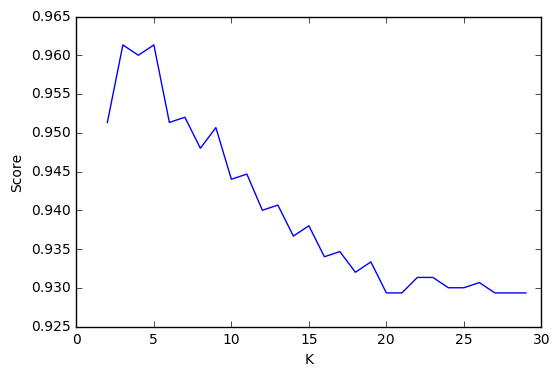

In [44]:
"""
optimus is a function to obtain the best parameters of a given classifier. 
"""
def optimus(classifier, parameter_name, param_grid, x, y, x_label):
    gs_cv = GridSearchCV(classifier, param_grid=param_grid, cv=10)
    gs_cv.fit(x,y)
    bests= list(gs_cv.best_params_.values())
    plt.plot(param_grid[parameter_name],gs_cv.cv_results_['mean_test_score'])
    plt.xlabel(x_label)
    plt.ylabel("Score") #also known as the accuracies
    return bests[0]

#Optimizing k nearest neighbors 
parameters_k = {'n_neighbors': np.arange(2, 30)} #random range of k values from 2 to 30
optimized_k = optimus(KNeighborsClassifier(), 'n_neighbors', parameters_k, X_train_mnist, y_train_mnist,"K")
print(optimized_k)

### Sklearn Logistic Regression Notes
For the logistic regression, the function uses a C instead of a lambda, C is the inverse of lambda (inverse of the regularization parameter). Aside from that, it is basically the lambda in the formulas.

0.267894736842


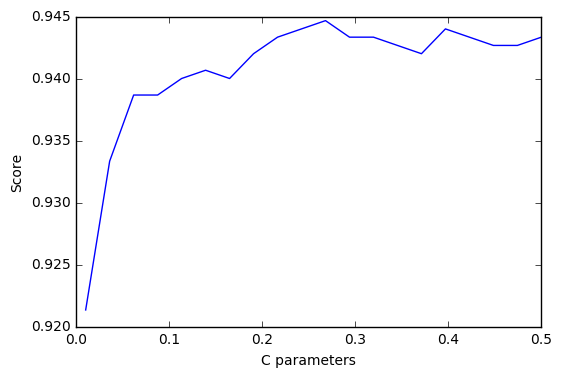

In [45]:
#Optimizing the Logistic Regression
minimum = 0.01
maximum = 0.50
steps = 20
C_list = np.linspace(minimum,maximum,num=steps)
parameters_C = {'C' : C_list} #dictionary of Cs
optimized_C = optimus(LogisticRegression(), 'C', parameters_C, X_train_mnist, y_train_mnist, "C parameters") 
print(optimized_C)

## 2.  Training logistic regression and k-nn using optimized parameters

In [56]:
#The Optimized classifiers
optim_log = LogisticRegression(C=optimized_C)
optim_knn = KNeighborsClassifier(n_neighbors = optimized_k)

optim_log_results = cross_validate(optim_log,X_train_mnist,y_train_mnist)
optim_knn_results = cross_validate(optim_knn,X_train_mnist,y_train_mnist)
print("*******LOGISTIC REGRESSION*******")
print("Before the optimization:")
print("Average of the Log_Regression: {} std of the Log_Regression: {}".format(log_cross_validate[0],log_cross_validate[1]))
print("After the optimization:")
print("Average of the Log_Regression: {} std of the Log_Regression: {}".format(optim_log_results[0],optim_log_results[1])) 
print("****KNN*****")
print("Before Optimization:")
print("Average: {} Std: {}".format(knn_cross_validate[0],knn_cross_validate[1]))
print("After Optimization:")
print("Average: {} Std: {}".format(optim_knn_results[0],optim_knn_results[1]))


*******LOGISTIC REGRESSION*******
Before the optimization:
Average of the Log_Regression: 0.9434642578237142 std of the Log_Regression: 0.02224388563710969
After the optimization:
Average of the Log_Regression: 0.9447458689376826 std of the Log_Regression: 0.020773579104804134
****KNN*****
Before Optimization:
Average: 0.9615829381706359 Std: 0.02621536081196076
After Optimization:
Average: 0.9615250325819475 Std: 0.02251941870934826


## Classification reports

In [65]:
print("*****Logistic Regression Report*****")
lr_predictions = optim_log.fit(X_train_mnist,y_train_mnist).predict(X_test_mnist)
print(classification_report(y_test_mnist,lr_predictions))
print("Accuracy for the Logistic Regression: ",accuracy_score(y_test_mnist,lr_predictions))
print("\n")
print("*****K_NN Report*****")
knn_predictions = optim_knn.fit(X_train_mnist,y_train_mnist).predict(X_test_mnist)
print(classification_report(y_test_mnist,knn_predictions))
print("Accuracy for the K Nearest Neigbors: ",accuracy_score(y_test_mnist,knn_predictions))

*****Logistic Regression Report*****
             precision    recall  f1-score   support

          0       0.89      0.93      0.91        27
          1       0.88      0.90      0.89        31
          2       1.00      0.96      0.98        27
          3       0.90      0.60      0.72        30
          4       0.94      0.91      0.92        33
          5       0.86      1.00      0.92        30
          6       0.94      1.00      0.97        30
          7       0.87      0.90      0.89        30
          8       0.72      0.93      0.81        28
          9       0.92      0.74      0.82        31

avg / total       0.89      0.89      0.88       297

Accuracy for the Logistic Regression:  0.885521885522


*****K_NN Report*****
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.89      1.00      0.94        31
          2       0.93      0.96      0.95        27
          3       0.96      0.80 

## Analysis of the Classification Reports

Overall, the performance of the K Nearest Neighbors classifier is better than the Logistic Regression classsifier. With the K_NN having better precision, recall, f1-score s in general compared to the Logistic Regression. However, we can see that it is not always the case with some labels. For label 2, the Logistic Regression has perfect precision. But the K_NN has 3 labels with perfect precision.


# Confusion Matrices

In [67]:
print("Logistic Regression matrix")
print(confusion_matrix(y_test_mnist,lr_predictions))
print("\n")
print("K Nearest Neighbors matrix")
print(confusion_matrix(y_test_mnist,knn_predictions))

Logistic Regression matrix
[[25  0  0  0  0  0  2  0  0  0]
 [ 0 28  0  1  0  0  0  0  2  0]
 [ 1  0 26  0  0  0  0  0  0  0]
 [ 0  2  0 18  0  3  0  3  4  0]
 [ 0  0  0  0 30  0  0  0  1  2]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  2  0  0 27  1  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 2  0  0  1  0  2  0  1  2 23]]


K Nearest Neighbors matrix
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  1 26  0  0  0  0  0  0  0]
 [ 0  0  2 24  0  1  0  2  1  0]
 [ 0  0  0  0 29  0  0  1  1  2]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  1  0 29  0  0]
 [ 0  3  0  0  0  0  0  0 25  0]
 [ 0  0  0  1  0  2  0  2  0 26]]


## Analysis of Confusion Matrices

How to read: the diagonals are the numbers of correct predicted instances. While the numbers besides the diagonals are the incorrect predicted instances (misclassified). From these matrices, they both incorrectly classified labels: 2,3,4,7,8,9. The recall score reflects the number of correctly classified instances. For example, in the Logistic Regression classification report, the recall score for it's class 3 is only 0.60, and this score is reflected in the fact that only 18 instances were correctly classified with the Logistic Regression.

## Results and analysis of the experiment

In my implementation, by optimizing the parameters k and C using cross validation methods, I obtained a very slightly better accuracy compared to before optimizing the parameters. The standard deviation was also lower with the optimized parameters, so it shows that using the optimized parameters we have better precision in getting the accuracy.

For this dataset, the MNIST, we know that the K Nearest Neighbors is more efficient in dealing with this dataset. Especially because of its higher accuracy score of 0.93 compared to Logistic Regression with only 0.88.